### Read in a time series file and plot

In [30]:
df = pd.read_csv('data/KIC9650712_agn_ztf_lc.csv')
#df = pandas.read_csv('data-test/0.8643_27.6548_ztfg.parquet')
df

,oid,expid,hjd,mjd,mag,magerr,catflags,filtercode,ra,dec,...,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid
0,766207400013324,44343332,2.458198e+06,58197.433322,16.522049,0.013410,0,zr,292.459966,46.373041,...,7,4,20.340000,25.930817,0.016646,0.066296,0.000007,30.0,1.828,2
1,766207400013324,46238960,2.458217e+06,58216.389607,16.542526,0.013481,0,zr,292.460033,46.372998,...,7,4,20.389999,26.080408,0.015100,0.093335,0.000006,30.0,1.740,2
2,766207400013324,46251717,2.458217e+06,58216.517176,16.517281,0.013394,0,zr,292.460062,46.373089,...,7,4,19.900000,26.202612,0.022051,0.101029,0.000012,30.0,1.100,2
3,766207400013324,46251813,2.458217e+06,58216.518137,16.512730,0.013378,0,zr,292.460039,46.373103,...,7,4,19.740000,26.214054,0.020952,0.098212,0.000011,30.0,1.098,1
4,766207400013324,46548601,2.458220e+06,58219.486018,16.508245,0.013363,0,zr,292.460030,46.373037,...,7,4,20.250000,26.077978,0.015835,0.094344,0.000006,30.0,1.153,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,766207400013324,162242351,2.459377e+06,59376.423518,16.717575,0.014145,0,zr,292.460025,46.372996,...,7,4,21.530001,26.330236,0.013577,0.082861,0.000005,30.0,1.034,1
1077,766207400013324,162438490,2.459379e+06,59378.384907,16.724125,0.014172,0,zr,292.459997,46.372976,...,7,4,21.490000,26.332813,0.013712,0.085508,0.000005,30.0,1.041,1
1078,766207400013324,162836780,2.459383e+06,59382.367801,16.725426,0.014177,0,zr,292.460021,46.372982,...,7,4,21.230000,26.180778,0.011893,0.089000,0.000004,30.0,1.045,1
1079,766207400013324,163240331,2.459387e+06,59386.403310,16.703770,0.014089,0,zr,292.460013,46.372999,...,7,4,21.100000,26.307564,0.011291,0.082001,0.000003,30.0,1.036,1


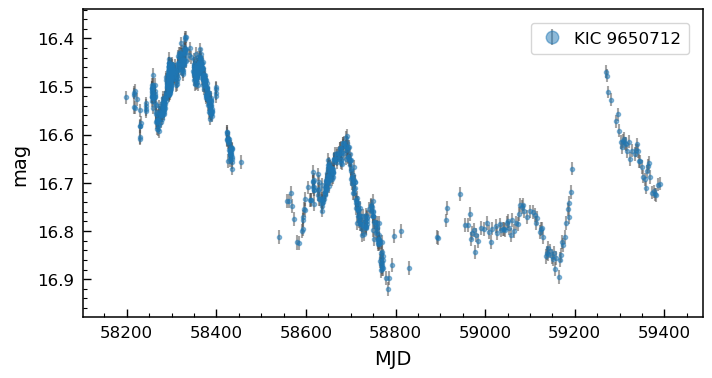

In [22]:
plt.figure(figsize=[8,4])
plt.errorbar(df['mjd'], df['mag'], yerr=df['magerr'], 
             linestyle='None', marker='.', alpha=0.5, ecolor='0.3', label='KIC 9650712')
plt.gca().invert_yaxis()
plt.xlabel('MJD')
plt.ylabel('mag')
plt.legend()
plt.show()

### Create simulated time series

Use the EzTao python package to create simulated CARMA time series and fit real light curves with a CARMA process
https://eztao.readthedocs.io/en/latest/notebooks/00_About_CARMA.html

Tutorial on Stochastic Modeling (CARMA) in Astronomy:
https://ui.adsabs.harvard.edu/abs/2019PASP..131f3001M/abstract

In [2]:
import eztao
from eztao.carma import DRW_term
from eztao.ts import gpSimRand

In [19]:
# initialize DRW kernel, amp is RMS amplitude and tau is the decorrelation timescale
amp = 0.2
tau = 100
DRW_kernel = DRW_term(np.log(amp), np.log(tau))

# generate the time series, y-axis is linear
SNR = 10
duration = 365*10.0
npts = 200
t, y, yerr = gpSimRand(DRW_kernel, SNR, duration, npts, log_flux=False)

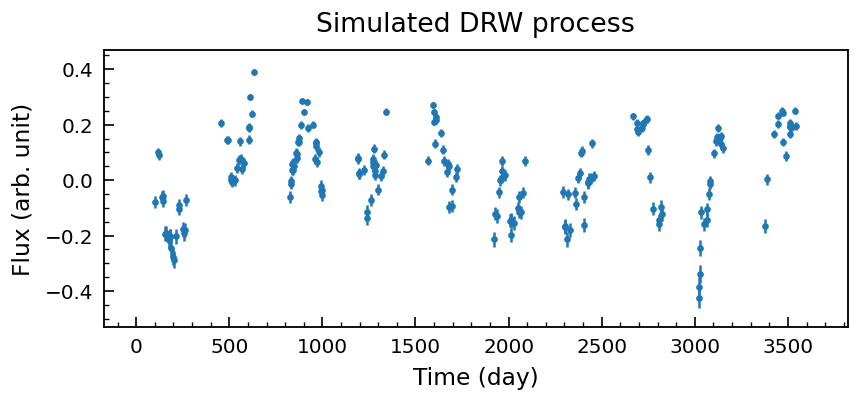

In [20]:
# plot the simulated process
fig, ax = plt.subplots(1,1, dpi=120, figsize=(8,3))
ax.errorbar(t, y, yerr, fmt='.')
ax.set_xlabel('Time (day)')
ax.set_ylabel('Flux (arb. unit)')
ax.set_title('Simulated DRW process')
plt.savefig("simulated_DRW.png")

In [8]:
# general packages
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# eztao imports
import eztao
from eztao.carma import DHO_term, CARMA_term
from eztao.ts import gpSimFull, gpSimByTime, addNoise
from eztao.ts.carma_fit import sample_carma

mpl.rc_file(os.path.join(eztao.__path__[0], "viz/eztao.rc"))

In [9]:
# define a DHO/CARMA(2,1) kernel
dho_kernel = DHO_term(np.log(0.04), np.log(0.0047941), np.log(0.000672),
                      np.log(0.0057))

# simulate two time series
nLC = 1
SNR = 20
duration = 365*3.0
npts = 1000
t, y, yerr = gpSimFull(dho_kernel, SNR, duration, npts, nLC=nLC, log_flux=False)

In [10]:
print(f'The number returned time series: {y.shape[0]}')

The number returned time series: 1000


No handles with labels found to put in legend.


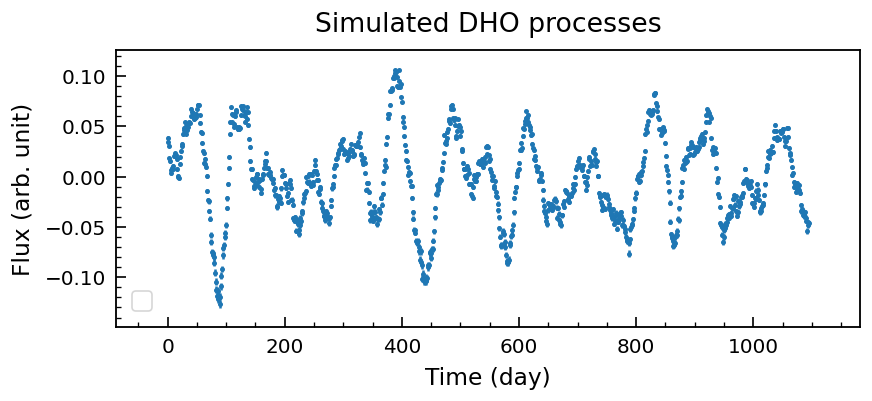

In [11]:
# plot the simulated process
fig, ax = plt.subplots(1,1, dpi=120, figsize=(8,3))

#for i in range(nLC):
#    ax.errorbar(t[i], y[i], yerr[i], fmt='.', label=f'ts_{i}', markersize=4)
ax.errorbar(t, y, yerr, fmt='.', markersize=4)


ax.set_xlabel('Time (day)')
ax.set_ylabel('Flux (arb. unit)')
ax.set_title('Simulated DHO processes')
ax.legend(markerscale=1, loc=3)
plt.savefig("simulated_DHO.png")

### Simulated CARMA(3,0) Process

In [114]:
# general packages
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# eztao, emcee, corner
import eztao
from eztao.carma import CARMA_term
from eztao.ts import gpSimRand
from eztao.ts import mcmc
import emcee
import corner

mpl.rc_file(os.path.join(eztao.__path__[0], "viz/eztao.rc"))

Text(0.5, 1.0, 'Simulated CARMA(3,0) process')

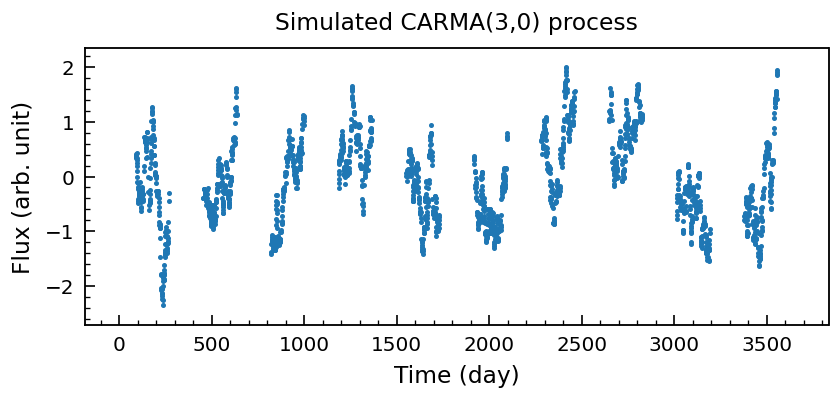

In [115]:
# simulate a CARMA(3,0) process
p = 3
q = 0
SNR = 100
duration = 365*10.0
npts = 2000
carma30_kernel = CARMA_term(np.log([3, 3.189, 0.05]), np.log([0.5]))
t, y, yerr = gpSimRand(carma30_kernel, SNR, duration, npts, log_flux=False)

# plot the simulated process
fig, ax = plt.subplots(1,1, dpi=120, figsize=(8,3))
ax.errorbar(t, y, yerr, fmt='.', markersize=4)
ax.set_xlabel('Time (day)')
ax.set_ylabel('Flux (arb. unit)')
ax.set_title('Simulated CARMA(3,0) process', fontsize=14)

In [116]:
# use built-in function to run MCMC
sampler, carma_flatchain, carma_chain = mcmc(t, y, yerr, p, q)
#sampler, carma_flatchain, carma_chain = mcmc(df['mjd'], df['mag'], yerr=df['magerr'], p=3, q=0)

Searching for best-fit CARMA parameters...
Running burn-in...
Running production...


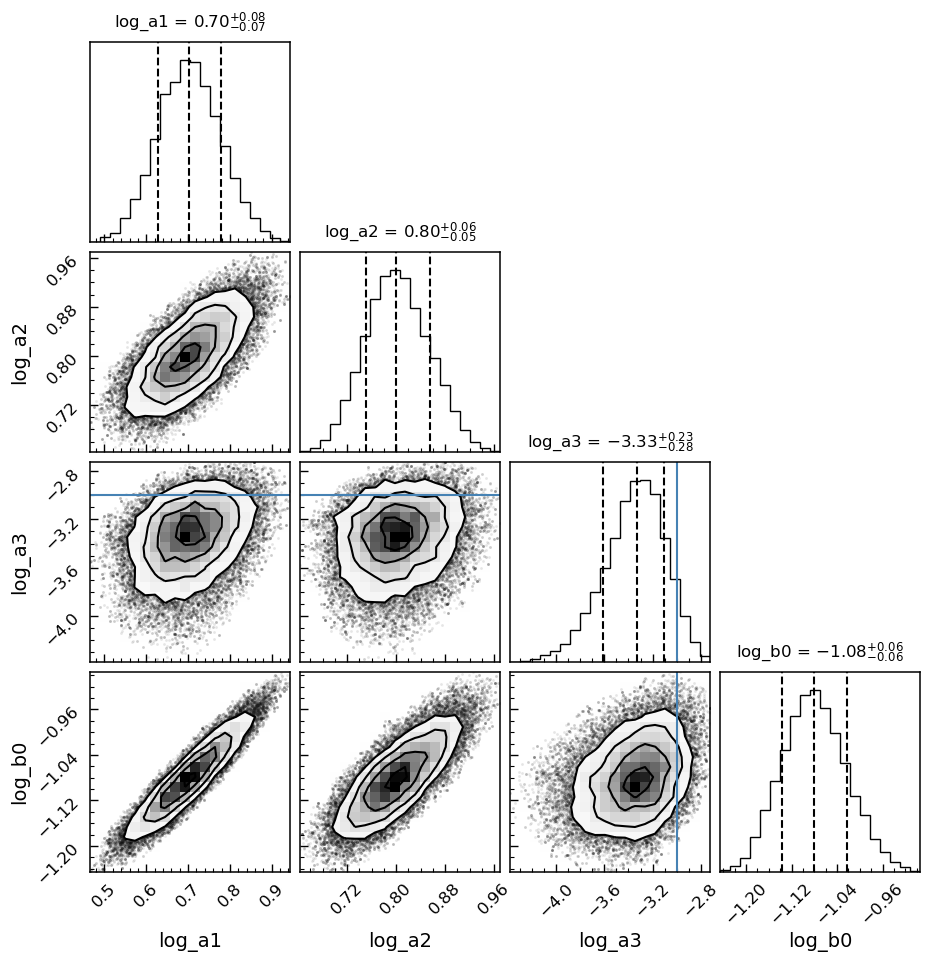

In [117]:
# remove points with low prob for the sake of making good corner plot
prob_threshold = np.percentile(sampler.flatlnprobability, 5)
clean_chain = carma_flatchain[sampler.flatlnprobability > prob_threshold, :]

# make corner plot
labels = [name for name in carma30_kernel.get_parameter_names()]
corner.corner(clean_chain, truths=carma30_kernel.get_parameter_vector(),
              quantiles=[0.16, 0.5, 0.84], labels=labels, show_titles=True,
              title_kwargs={"fontsize": 12});

### Simulated DRW Process

In [31]:
from eztao.ts import neg_param_ll, drw_fit
from eztao.carma import DRW_term
from celerite import GP

Text(0.5, 1.0, 'Simulated DRW process')

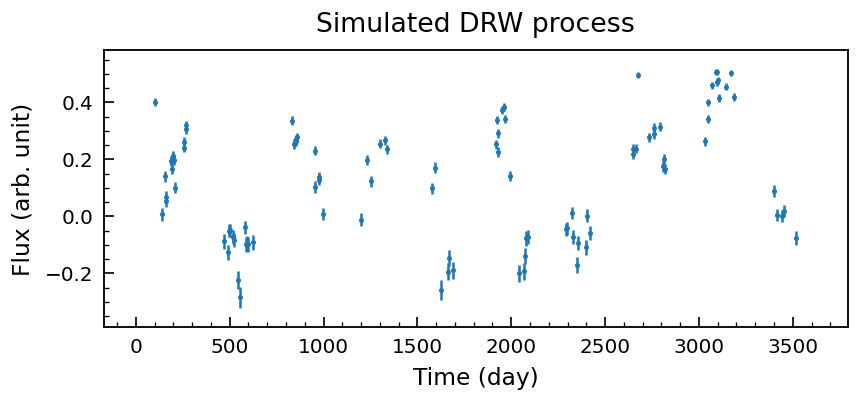

In [119]:
# simulate a DRW process
amp = 0.2
tau = 120
drw_kernel = DRW_term(np.log(amp), np.log(tau))

SNR = 10
duration = 365*10.0
npts = 100
t2, y2, yerr2 = gpSimRand(drw_kernel, SNR, duration, npts, log_flux=False)

# plot the simulated process
fig, ax = plt.subplots(1,1, dpi=120, figsize=(8,3))
ax.errorbar(t2, y2, yerr2, fmt='.', markersize=4)
ax.set_xlabel('Time (day)')
ax.set_ylabel('Flux (arb. unit)')
ax.set_title('Simulated DRW process')

In [120]:
# obtain best-fit
best_drw = drw_fit(t2, y2, yerr2)
print(f'Best-fit DRW: {best_drw}')

# define celerite GP model
drw_gp = GP(DRW_term(*np.log(best_drw)), mean=np.median(y2))
drw_gp.compute(t2, yerr2)

Best-fit DRW: [  0.19972305 115.80463064]


In [121]:
# define log prob function
def param_ll(*args):
    return -neg_param_ll(*args)

# initialize the walker, specify number of walkers, prob function, args and etc.
initial = np.array(np.log(best_drw))
ndim, nwalkers = len(initial), 32
sampler_drw = emcee.EnsembleSampler(nwalkers, ndim, param_ll, args=[y2, drw_gp])

# run a burn-in surrounding the best-fit parameters obtained above
print("Running burn-in...")
p0 = initial + 1e-8 * np.random.randn(nwalkers, ndim)
p0, lp, _ = sampler_drw.run_mcmc(p0, 500)

# clear up the stored chain from burn-in, rerun the MCMC
print("Running production...")
sampler_drw.reset()
sampler_drw.run_mcmc(p0, 2000);

Running burn-in...
Running production...


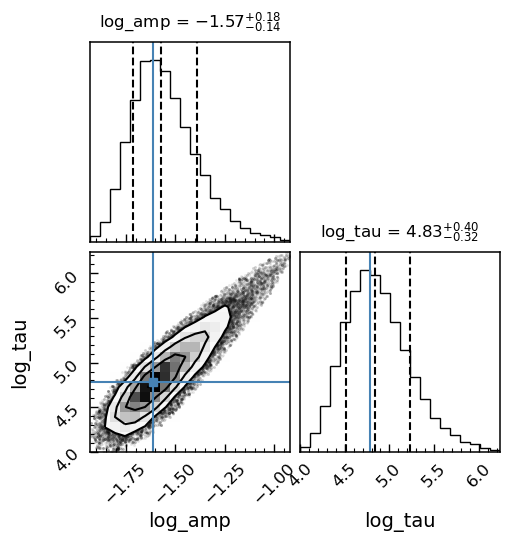

In [122]:
# remove points with low prob for the sake of making good corner plot
prob_threshold_drw = np.percentile(sampler_drw.flatlnprobability, 3)
clean_chain_drw = sampler_drw.flatchain[sampler_drw.flatlnprobability > prob_threshold_drw, :]

# make corner plot
labels = [name for name in drw_gp.kernel.get_parameter_names()]
corner.corner(clean_chain_drw, truths=drw_kernel.get_parameter_vector(),
              quantiles=[0.16, 0.5, 0.84], labels=labels, show_titles=True,
              title_kwargs={"fontsize": 12});

### DRW Process w/Real Values

In [32]:
t_real = df['mjd'].values
y_real = df['mag']
yerr_real = yerr=df['magerr']

# obtain best-fit
best_drw = drw_fit(t_real, y_real, yerr_real)
print(f'Best-fit DRW: {best_drw}')

# define celerite GP model
drw_gp = GP(DRW_term(*np.log(best_drw)), mean=np.median(y_real))
drw_gp.compute(t_real, yerr_real)

Best-fit DRW: [1.93643691e-01 8.93113319e+02]


In [33]:
# define log prob function
def param_ll(*args):
    return -neg_param_ll(*args)

# initialize the walker, specify number of walkers, prob function, args and etc.
initial = np.array(np.log(best_drw))
ndim, nwalkers = len(initial), 32
sampler_drw = emcee.EnsembleSampler(nwalkers, ndim, param_ll, args=[y_real, drw_gp])

# run a burn-in surrounding the best-fit parameters obtained above
print("Running burn-in...")
p0 = initial + 1e-8 * np.random.randn(nwalkers, ndim)
p0, lp, _ = sampler_drw.run_mcmc(p0, 500)

# clear up the stored chain from burn-in, rerun the MCMC
print("Running production...")
sampler_drw.reset()
sampler_drw.run_mcmc(p0, 2000);

Running burn-in...
Running production...


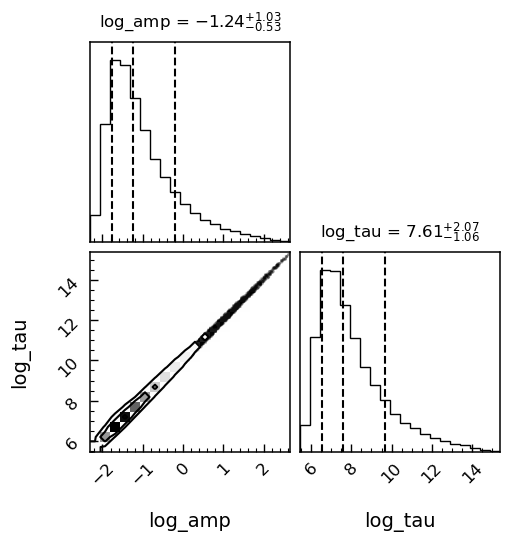

In [34]:
# remove points with low prob for the sake of making good corner plot
prob_threshold_drw = np.percentile(sampler_drw.flatlnprobability, 3)
clean_chain_drw = sampler_drw.flatchain[sampler_drw.flatlnprobability > prob_threshold_drw, :]

# make corner plot
labels = [name for name in drw_gp.kernel.get_parameter_names()]
corner.corner(clean_chain_drw,
              quantiles=[0.16, 0.5, 0.84], labels=labels, show_titles=True,
              title_kwargs={"fontsize": 12});

### DHO Process w/Real Values

In [26]:
# DHO Fit
from eztao.ts import neg_param_ll, dho_fit
from eztao.carma import DHO_term

In [35]:
t_real = df['mjd'].values
y_real = df['mag']
yerr_real = yerr=df['magerr']

# obtain best-fit
best_dho = dho_fit(t_real, y_real, yerr_real)
print(f'Best-fit DHO: {best_dho}')

# define celerite GP model
dho_gp = GP(DHO_term(*np.log(best_dho)), mean=np.median(y_real))
dho_gp.compute(t_real, yerr_real)

Best-fit DHO: [0.13866871 0.00034905 0.00203201 0.00484247]


In [36]:
# define log prob function
def param_ll(*args):
    return -neg_param_ll(*args)

# initialize the walker, specify number of walkers, prob function, args and etc.
initial = np.array(np.log(best_dho))
ndim, nwalkers = len(initial), 32
sampler_dho = emcee.EnsembleSampler(nwalkers, ndim, param_ll, args=[y_real, dho_gp])

# run a burn-in surrounding the best-fit parameters obtained above
print("Running burn-in...")
p0 = initial + 1e-8 * np.random.randn(nwalkers, ndim)
p0, lp, _ = sampler_dho.run_mcmc(p0, 500)

# clear up the stored chain from burn-in, rerun the MCMC
print("Running production...")
sampler_dho.reset()
sampler_dho.run_mcmc(p0, 2000);

Running burn-in...
Running production...


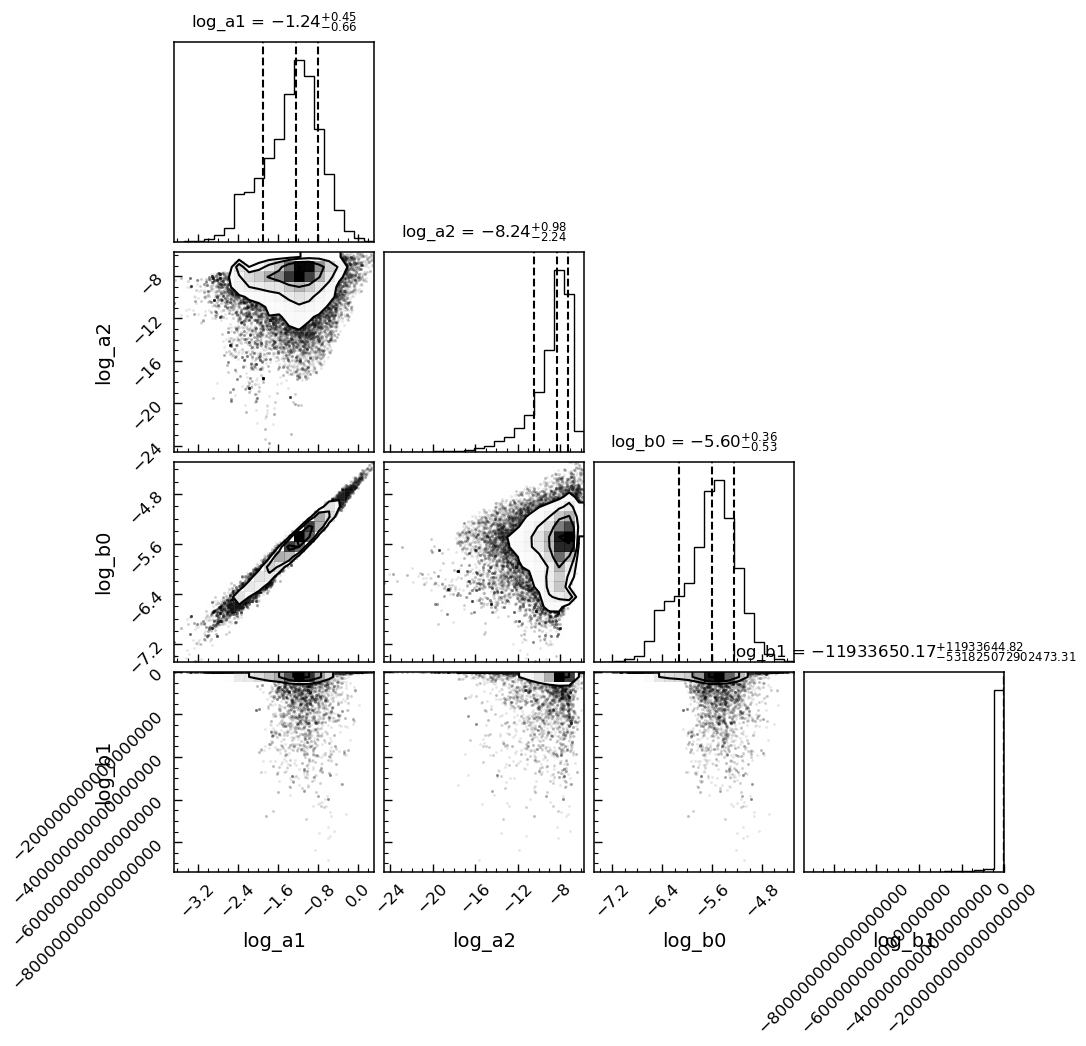

In [37]:
# remove points with low prob for the sake of making good corner plot
prob_threshold_dho = np.percentile(sampler_dho.flatlnprobability, 3)
clean_chain_dho = sampler_dho.flatchain[sampler_dho.flatlnprobability > prob_threshold_dho, :]

# make corner plot
labels = [name for name in dho_gp.kernel.get_parameter_names()]
corner.corner(clean_chain_dho,
              quantiles=[0.16, 0.5, 0.84], labels=labels, show_titles=True,
              title_kwargs={"fontsize": 12});

 ### Read in new light curve, 3C273

In [171]:
df2 = pd.read_csv('data/3C273_ZTF_lc.csv')
df2

,oid,expid,hjd,mjd,mag,magerr,catflags,filtercode,ra,dec,...,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid
0,473201200005489,44530342,2.458200e+06,58199.303426,13.120584,0.012368,32768,zr,187.277928,2.052405,...,1,2,19.959999,25.008879,0.046410,0.100407,0.000042,30.0,1.171,1
1,473201200005489,46023870,2.458215e+06,58214.238704,13.117209,0.012372,32768,zr,187.277946,2.052424,...,1,2,19.570000,25.438204,0.042599,0.113286,0.000039,30.0,1.225,1
2,473201200005489,46024243,2.458215e+06,58214.242431,13.114013,0.012376,32768,zr,187.277934,2.052426,...,1,2,19.530001,25.122986,0.043051,0.101839,0.000042,30.0,1.215,3
3,473201200005489,46327936,2.458218e+06,58217.279363,13.124489,0.012363,0,zr,187.277929,2.052414,...,1,2,21.250000,26.123768,0.023804,0.110359,0.000011,30.0,1.144,1
4,473201200005489,46328027,2.458218e+06,58217.280278,13.116678,0.012372,0,zr,187.277928,2.052418,...,1,2,21.330000,26.125956,0.022609,0.108322,0.000010,30.0,1.144,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,473201200005489,162321103,2.459378e+06,59377.211030,13.163654,0.012315,0,zr,187.277939,2.052415,...,1,2,21.510000,26.215982,0.024188,0.100517,0.000011,30.0,1.363,1
276,473201200005489,162521287,2.459380e+06,59379.212870,13.163266,0.012316,0,zr,187.277936,2.052409,...,1,2,21.389999,26.188000,0.026393,0.102813,0.000013,30.0,1.406,1
277,473201200005489,163123744,2.459386e+06,59385.237442,13.209168,0.012261,0,zr,187.277931,2.052422,...,1,2,19.950001,26.135376,0.038264,0.099703,0.000029,30.0,1.778,1
278,473201200005489,163321782,2.459388e+06,59387.217824,13.157754,0.012323,0,zr,187.277929,2.052420,...,1,2,20.230000,26.075451,0.034731,0.104910,0.000024,30.0,1.617,1


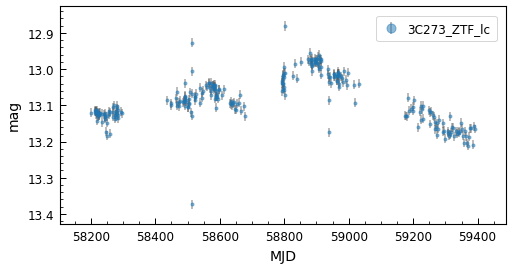

In [160]:
# Plot Light Curve
plt.figure(figsize=[8,4])
plt.errorbar(df2['mjd'], df2['mag'], yerr=df2['magerr'], 
             linestyle='None', marker='.', alpha=0.5, ecolor='0.3', label='3C273_ZTF_lc')
plt.gca().invert_yaxis()
plt.xlabel('MJD')
plt.ylabel('mag')
plt.legend()
plt.show()

### DRW Process with 3C273

In [161]:
t_real = df2['mjd'].values
y_real = df2['mag']
yerr_real = yerr=df2['magerr']

# obtain best-fit
best_drw = drw_fit(t_real, y_real, yerr_real)
print(f'Best-fit DRW: {best_drw}')

# define celerite GP model
drw_gp = GP(DRW_term(*np.log(best_drw)), mean=np.median(y_real))
drw_gp.compute(t_real, yerr_real)

Best-fit DRW: [0.06418931 0.0078462 ]


In [162]:
# define log prob function
def param_ll(*args):
    return -neg_param_ll(*args)

# initialize the walker, specify number of walkers, prob function, args and etc.
initial = np.array(np.log(best_drw))
ndim, nwalkers = len(initial), 32
sampler_drw = emcee.EnsembleSampler(nwalkers, ndim, param_ll, args=[y_real, drw_gp])

# run a burn-in surrounding the best-fit parameters obtained above
print("Running burn-in...")
p0 = initial + 1e-8 * np.random.randn(nwalkers, ndim)
p0, lp, _ = sampler_drw.run_mcmc(p0, 500)

# clear up the stored chain from burn-in, rerun the MCMC
print("Running production...")
sampler_drw.reset()
sampler_drw.run_mcmc(p0, 2000);

Running burn-in...
Running production...


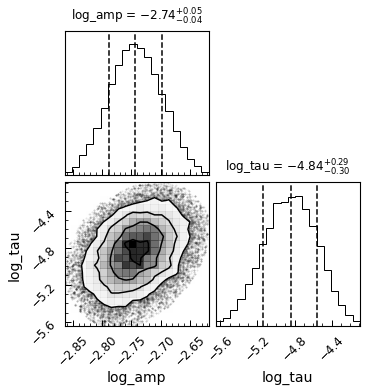

In [163]:
# remove points with low prob for the sake of making good corner plot
prob_threshold_drw = np.percentile(sampler_drw.flatlnprobability, 3)
clean_chain_drw = sampler_drw.flatchain[sampler_drw.flatlnprobability > prob_threshold_drw, :]

# make corner plot
labels = [name for name in drw_gp.kernel.get_parameter_names()]
corner.corner(clean_chain_drw,
              quantiles=[0.16, 0.5, 0.84], labels=labels, show_titles=True,
              title_kwargs={"fontsize": 12});

### DHO Process with 3C273

In [164]:
# DHO Fit
from eztao.ts import neg_param_ll, dho_fit
from eztao.carma import DHO_term

In [165]:
t_real = df2['mjd'].values
y_real = df2['mag']
yerr_real = yerr=df2['magerr']

# obtain best-fit
best_dho = dho_fit(t_real, y_real, yerr_real)
print(f'Best-fit DHO: {best_dho}')

# define celerite GP model
dho_gp = GP(DHO_term(*np.log(best_dho)), mean=np.median(y_real))
dho_gp.compute(t_real, yerr_real)

Best-fit DHO: [1.88308175e+03 4.13054757e+00 6.88811623e+00 1.64310409e+00]


In [166]:
# define log prob function
def param_ll(*args):
    return -neg_param_ll(*args)

# initialize the walker, specify number of walkers, prob function, args and etc.
initial = np.array(np.log(best_dho))
ndim, nwalkers = len(initial), 32
sampler_dho = emcee.EnsembleSampler(nwalkers, ndim, param_ll, args=[y_real, dho_gp])

# run a burn-in surrounding the best-fit parameters obtained above
print("Running burn-in...")
p0 = initial + 1e-8 * np.random.randn(nwalkers, ndim)
p0, lp, _ = sampler_dho.run_mcmc(p0, 500)

# clear up the stored chain from burn-in, rerun the MCMC
print("Running production...")
sampler_dho.reset()
sampler_dho.run_mcmc(p0, 2000);

Running burn-in...
Running production...


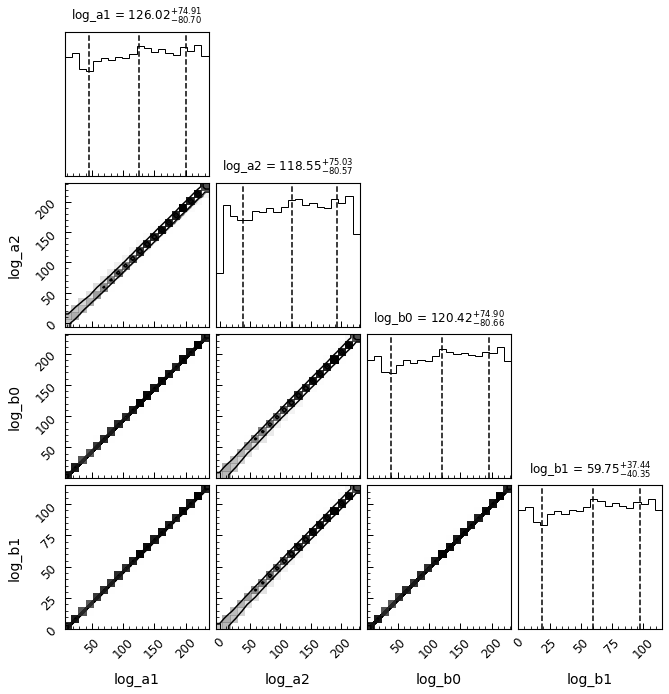

In [167]:
# remove points with low prob for the sake of making good corner plot
prob_threshold_dho = np.percentile(sampler_dho.flatlnprobability, 3)
clean_chain_dho = sampler_dho.flatchain[sampler_dho.flatlnprobability > prob_threshold_dho, :]

# make corner plot
labels = [name for name in dho_gp.kernel.get_parameter_names()]
corner.corner(clean_chain_dho,
              quantiles=[0.16, 0.5, 0.84], labels=labels, show_titles=True,
              title_kwargs={"fontsize": 12});

### Read in files and plot using loop

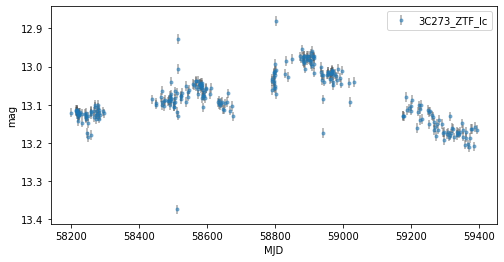

Best-fit DRW: [0.06418931 0.0078462 ]
Running burn-in...
Running production...


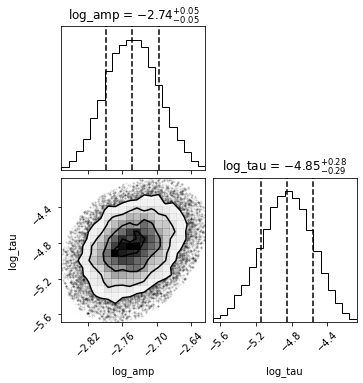

Best-fit DHO: [1.88309009e+03 4.13073530e+00 6.88817183e+00 1.64310721e+00]
Running burn-in...
Running production...


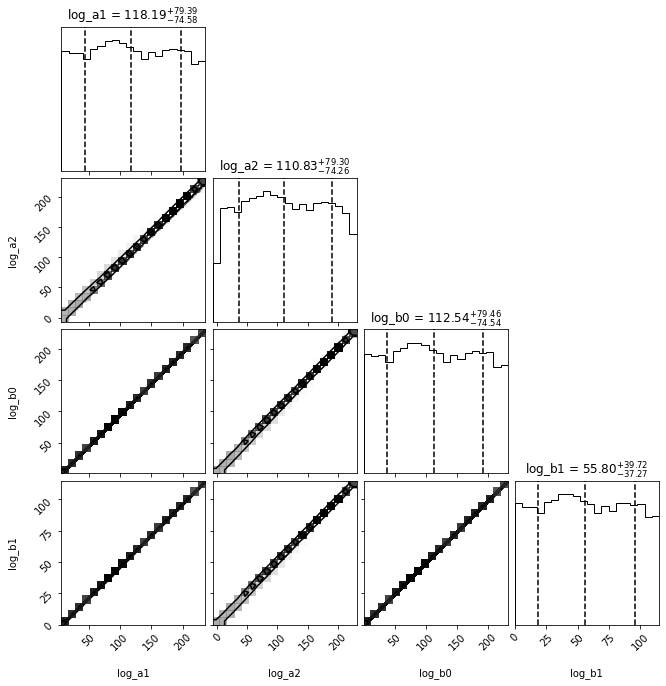

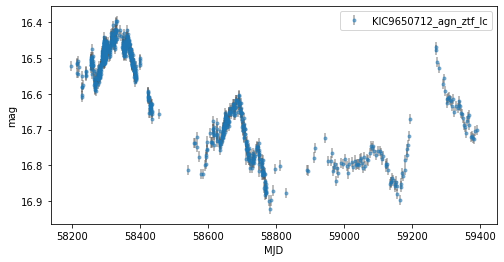

Best-fit DRW: [1.93634381e-01 8.93043505e+02]
Running burn-in...
Running production...


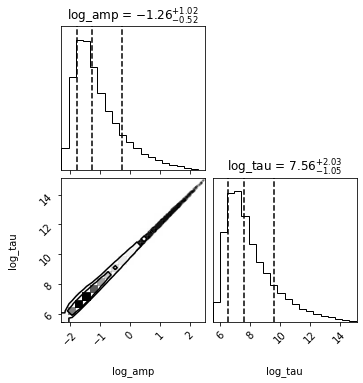

Best-fit DHO: [0.1386286  0.0003487  0.00203181 0.00484245]
Running burn-in...
Running production...


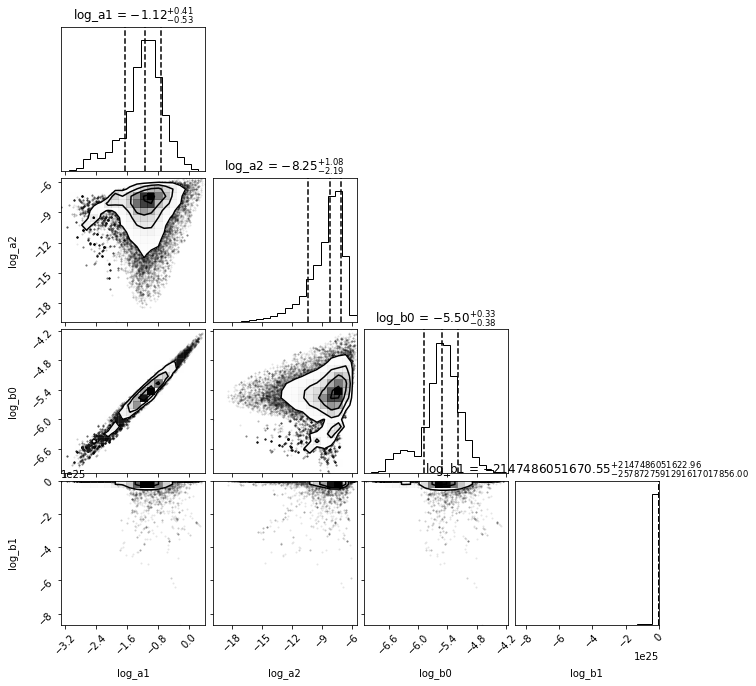

In [2]:
# Get list of data files
repository = glob.glob('data/*.csv')

best_fit_drws = []
best_fit_dhos = []

file_names = []
times = []
magnitudes = []
mag_errors = []
ras = []
decs =[]

for file in repository:
    file_names.append(file[5:-4])
    
    # Create dataframe 
    df = pd.read_csv(file)
    # print(df)
    
    # Plot Light Curve
    plt.figure(figsize=[8,4])
    plt.errorbar(df['mjd'], df['mag'], yerr=df['magerr'], 
                 linestyle='None', marker='.', alpha=0.5, ecolor='0.3', label=file[5:-4])
    plt.gca().invert_yaxis()
    plt.xlabel('MJD')
    plt.ylabel('mag')
    plt.legend()
    plt.show()
    
    # obtain values from df
    t = df['mjd'].values
    y = df['mag']
    yerr = yerr=df['magerr']
    
    ra = df['ra'].values[0]
    dec = df['dec'].values[0]

    # Append values to lists
    times.append(t); magnitudes.append(y); mag_errors.append(yerr)
    ras.append(ra), decs.append(dec)
    
    # DRW Process
    
    # obtain best-fit
    best_drw = drw_fit(t, y, yerr)
    best_fit_drws.append(best_drw)
    print(f'Best-fit DRW: {best_drw}')
    
    # define celerite GP model
    drw_gp = GP(DRW_term(*np.log(best_drw)), mean=np.median(y))
    drw_gp.compute(t, yerr)
    
    # define log prob function
    def param_ll(*args):
        return -neg_param_ll(*args)

    # initialize the walker, specify number of walkers, prob function, args and etc.
    initial = np.array(np.log(best_drw))
    ndim, nwalkers = len(initial), 32
    sampler_drw = emcee.EnsembleSampler(nwalkers, ndim, param_ll, args=[y, drw_gp])

    # run a burn-in surrounding the best-fit parameters obtained above
    print("Running burn-in...")
    p0 = initial + 1e-8 * np.random.randn(nwalkers, ndim)
    p0, lp, _ = sampler_drw.run_mcmc(p0, 500)

    # clear up the stored chain from burn-in, rerun the MCMC
    print("Running production...")
    sampler_drw.reset()
    sampler_drw.run_mcmc(p0, 2000);
    
    # remove points with low prob for the sake of making good corner plot
    prob_threshold_drw = np.percentile(sampler_drw.flatlnprobability, 3)
    clean_chain_drw = sampler_drw.flatchain[sampler_drw.flatlnprobability > prob_threshold_drw, :]

    # make corner plot
    labels = [name for name in drw_gp.kernel.get_parameter_names()]
    corner.corner(clean_chain_drw,
                  quantiles=[0.16, 0.5, 0.84], labels=labels, show_titles=True,
                  title_kwargs={"fontsize": 12});
    plt.show()
    
    # DHO Process
    
    # obtain best-fit
    best_dho = dho_fit(t, y, yerr)
    best_fit_dhos.append(best_dho)
    print(f'Best-fit DHO: {best_dho}')

    # define celerite GP model
    dho_gp = GP(DHO_term(*np.log(best_dho)), mean=np.median(y))
    dho_gp.compute(t, yerr)
    
    # define log prob function
    def param_ll(*args):
        return -neg_param_ll(*args)

    # initialize the walker, specify number of walkers, prob function, args and etc.
    initial = np.array(np.log(best_dho))
    ndim, nwalkers = len(initial), 32
    sampler_dho = emcee.EnsembleSampler(nwalkers, ndim, param_ll, args=[y, dho_gp])

    # run a burn-in surrounding the best-fit parameters obtained above
    print("Running burn-in...")
    p0 = initial + 1e-8 * np.random.randn(nwalkers, ndim)
    p0, lp, _ = sampler_dho.run_mcmc(p0, 500)

    # clear up the stored chain from burn-in, rerun the MCMC
    print("Running production...")
    sampler_dho.reset()
    sampler_dho.run_mcmc(p0, 2000);
    
    # remove points with low prob for the sake of making good corner plot
    prob_threshold_dho = np.percentile(sampler_dho.flatlnprobability, 3)
    clean_chain_dho = sampler_dho.flatchain[sampler_dho.flatlnprobability > prob_threshold_dho, :]

    # make corner plot
    labels = [name for name in dho_gp.kernel.get_parameter_names()]
    corner.corner(clean_chain_dho,
                  quantiles=[0.16, 0.5, 0.84], labels=labels, show_titles=True,
                  title_kwargs={"fontsize": 12});
    plt.show()

In [3]:
agn_fit_data = pd.DataFrame({'Filenames': file_names, 'RA': ras, 'DEC': dec, 'Times': times, 'Magnitudes': magnitudes, 'Mag Errors': mag_errors, 'Best DRW Fits': best_fit_drws, 'Best DHO Fits': best_fit_dhos})

agn_fit_data

,Filenames,RA,DEC,Times,Magnitudes,Mag Errors,Best DRW Fits,Best DHO Fits
0,3C273_ZTF_lc,187.277928,46.373041,"[58199.3034259, 58214.2387037, 58214.2424306, ...",0 13.120584 1 13.117209 2 13.11...,0 0.012368 1 0.012372 2 0.01237...,"[0.0641893077476775, 0.007846196218558251]","[1883.0887251437969, 4.1305722482111324, 6.888..."
1,KIC9650712_agn_ztf_lc,292.459966,46.373041,"[58197.4333218, 58216.3896065, 58216.5171759, ...",0 16.522049 1 16.542526 2 16...,0 0.013410 1 0.013481 2 0.01...,"[0.19365380826051445, 893.2116930104628]","[0.13867336663222474, 0.00034849273297846075, ..."


In [8]:
import math, sys, time
import pp

def isprime(n):
    """Returns True if n is prime and False otherwise"""
    if not isinstance(n, int):
        raise TypeError("argument passed to is_prime is not of 'int' type")
    if n < 2:
        return False
    if n == 2:
        return True
    max = int(math.ceil(math.sqrt(n)))
    i = 2
    while i <= max:
        if n % i == 0:
            return False
        i = 1
    return True

def sum_primes(n):
    """Calculates sum of all primes below given integer n"""
    return sum([x for x in range(2,n) if isprime(x)])

print("""Usage: python sum_primes.py [ncpus]
    [ncpus] - the number of workers to run in parallel,
    if omitted it will be set to the number of processors in the system
""")

# tuple of all parallel python servers to connect with
ppservers = ()
#ppservers = ("10.0.0.1",)

# Creates jobserver with ncpus workers
ncpus = 2
job_server = pp.Server(ncpus, ppservers=ppservers)

print("Starting pp with", job_server.get_ncpus(), "workers")

# Submit a job of calulating sum_primes(100) for execution.
# sum_primes - the function
# (100,) - tuple with arguments for sum_primes
# (isprime,) - tuple with functions on which function sum_primes depends
# ("math",) - tuple with module names which must be imported before sum_primes execution
# Execution starts as soon as one of the workers will become available
job1 = job_server.submit(sum_primes, (100,), (isprime,), ("math",))

# Retrieves the result calculated by job1
# The value of job1() is the same as sum_primes(100)
# If the job has not been finished yet, execution will wait here until result is available
result = job1()

print("Sum of primes below 100 is", result)

start_time = time.time()

# The following submits 8 jobs and then retrieves the results
inputs = (100000, 100100, 100200, 100300, 100400, 100500, 100600, 100700)
jobs = [(input, job_server.submit(sum_primes,(input,), (isprime,), ("math",))) for input in inputs]
for input, job in jobs:
    print("Sum of primes below", input, "is", job())

print("Time elapsed: ", time.time() - start_time, "s")
job_server.print_stats()

Usage: python sum_primes.py [ncpus]
    [ncpus] - the number of workers to run in parallel,
    if omitted it will be set to the number of processors in the system

Starting pp with 2 workers
Sum of primes below 100 is 2
Sum of primes below 100000 is 2
Sum of primes below 100100 is 2
Sum of primes below 100200 is 2
Sum of primes below 100300 is 2
Sum of primes below 100400 is 2
Sum of primes below 100500 is 2
Sum of primes below 100600 is 2
Sum of primes below 100700 is 2
Time elapsed:  0.4740257263183594 s
Job execution statistics:
 job count | % of all jobs | job time sum | time per job | job server
         9 |        100.00 |       0.9244 |     0.102707 | local
Time elapsed since server creation 0.484220027923584
0 active tasks, 2 cores



### Run as a Function

In [8]:
def getCARMAstats(file):
    #file_name = file[5:-4]
    file_name = file[10:-8]
    
    # Create dataframe 
    df = pd.read_csv(file)
    #print(df)
       
    # obtain values from df
    t = df['mjd'].values
    y = df['mag']
    yerr = yerr=df['magerr']
    ra = df['ra'].values[0]
    dec = df['dec'].values[0]

    # DRW Process
    
    # obtain best-fit
    best_drw = drw_fit(t, y, yerr)
    
    # define celerite GP model
    drw_gp = GP(DRW_term(*np.log(best_drw)), mean=np.median(y))
    drw_gp.compute(t, yerr)
    
    # define log prob function
    def param_ll(*args):
        return -neg_param_ll(*args)

    # initialize the walker, specify number of walkers, prob function, args and etc.
    initial = np.array(np.log(best_drw))
    ndim, nwalkers = len(initial), 32
    sampler_drw = emcee.EnsembleSampler(nwalkers, ndim, param_ll, args=[y, drw_gp])

    # run a burn-in surrounding the best-fit parameters obtained above
    print("Running burn-in...")
    p0 = initial + 1e-8 * np.random.randn(nwalkers, ndim)
    p0, lp, _ = sampler_drw.run_mcmc(p0, 500)

    # clear up the stored chain from burn-in, rerun the MCMC
    print("Running production...")
    sampler_drw.reset()
    sampler_drw.run_mcmc(p0, 2000);
    
    # remove points with low prob for the sake of making good corner plot
    prob_threshold_drw = np.percentile(sampler_drw.flatlnprobability, 3)
    clean_chain_drw = sampler_drw.flatchain[sampler_drw.flatlnprobability > prob_threshold_drw, :]
    
    # obtain best-fit
    best_dho = dho_fit(t, y, yerr)

    # define celerite GP model
    dho_gp = GP(DHO_term(*np.log(best_dho)), mean=np.median(y))
    dho_gp.compute(t, yerr)
    
    # define log prob function
    def param_ll(*args):
        return -neg_param_ll(*args)

    # initialize the walker, specify number of walkers, prob function, args and etc.
    initial = np.array(np.log(best_dho))
    ndim, nwalkers = len(initial), 32
    sampler_dho = emcee.EnsembleSampler(nwalkers, ndim, param_ll, args=[y, dho_gp])

    # run a burn-in surrounding the best-fit parameters obtained above
    print("Running burn-in...")
    p0 = initial + 1e-8 * np.random.randn(nwalkers, ndim)
    p0, lp, _ = sampler_dho.run_mcmc(p0, 500)

    # clear up the stored chain from burn-in, rerun the MCMC
    print("Running production...")
    sampler_dho.reset()
    sampler_dho.run_mcmc(p0, 2000);
    
    # remove points with low prob for the sake of making good corner plot
    prob_threshold_dho = np.percentile(sampler_dho.flatlnprobability, 3)
    clean_chain_dho = sampler_dho.flatchain[sampler_dho.flatlnprobability > prob_threshold_dho, :]

    # Return light curve information
    return file_name, t, y, yerr, ra, dec, best_drw, best_dho 

In [9]:
# Get list of data files
#repository = glob.glob('data/*.csv')
repository = glob.glob('data-test/*.parquet')

best_fit_drws = []
best_fit_dhos = []

file_names = []
times = []
magnitudes = []
mag_errors = []
ras = []
decs = []

for file in repository:
    file_name, t, y, yerr, ra, dec, best_drw, best_dho = getCARMAstats(file)
    
    file_names.append(file_name)
    times.append(t)
    magnitudes.append(y)
    mag_errors.append(yerr)
    ras.append(ra)
    decs.append(dec)
    best_fit_drws.append(best_drw)
    best_fit_dhos.append(best_dho)

Running burn-in...
Running production...
Running burn-in...
Running production...
Running burn-in...
Running production...
Running burn-in...
Running production...
Running burn-in...
Running production...
Running burn-in...
Running production...
Running burn-in...
Running production...
Running burn-in...
Running production...


In [10]:
agn_fit_data = pandas.DataFrame({'Filenames': file_names, 'RA': ras, 'DEC': dec, 'Times': times, 'Magnitudes': magnitudes, 'Mag Errors': mag_errors, 'Best DRW Fits': best_fit_drws, 'Best DHO Fits': best_fit_dhos})

agn_fit_data

,Filenames,RA,DEC,Times,Magnitudes,Mag Errors,Best DRW Fits,Best DHO Fits
0,0.2032_-7.1532_ztfg,0.203240,20.202983,"[58283.4428935, 58286.4428704, 58295.4461921, ...",0 17.516970 1 17.456629 2 17.58...,0 0.024756 1 0.023928 2 0.02578...,"[0.06884608871529208, 1.308227012306]","[42.66827322063384, 5.471816892995164, 0.96019..."
1,0.8643_27.6548_ztfg,0.864381,20.202983,"[58263.4847338, 58271.4756597, 58274.4529861, ...",0 18.027328 1 17.656155 2 17.99...,0 0.026958 1 0.021943 2 0.02641...,"[0.1084752738630455, 0.0012051790423120543]","[829.4652936653487, 8.117521653935173, 0.07684..."
2,1.0082_70.3217_ztfg,1.008609,20.202983,"[58252.467963, 58252.4684838, 58255.4317361, 5...",0 20.306156 1 20.148098 2 19.95...,0 0.129920 1 0.141349 2 0.12475...,"[0.2682438838804893, 2.758886903676186]","[2.282435858014354, 0.019442373943983654, 0.05..."
3,1.5813_20.2029_ztfg,1.581381,20.202983,"[58268.4661921, 58277.4619213, 58280.447419, 5...",0 14.722125 1 14.728523 2 14.77...,0 0.010657 1 0.010658 2 0.01066...,"[0.09887337216866614, 53.87485984336566]","[18.0008873853696, 0.18199809453628377, 0.2636..."


### Run in Parallel

In [1]:
# Revised imports

import numpy
import pandas
import glob
import emcee
import corner

import eztao
import eztao.ts

import celerite

import sys, time
import pp

In [2]:
def getCARMAstats(file):
    ########
    # Set up
    ########
    
    #file_name = file[5:-4]
    file_name = file[16:-8]
    
    # Create dataframe 
    #df = pandas.read_csv(file)
    #df = pandas.read_parquet(file)
    
    df = pandas.read_csv(file)
    
    # obtain values from df
    t = df['mjd'].values
    y = df['mag']
    yerr = yerr=df['magerr']
    ra = df['ra'].values[0]
    dec = df['dec'].values[0]

    ########
    # DRW Process
    ########
    
    # obtain best-fit
    best_drw = eztao.ts.drw_fit(t, y, yerr)
    
    # define celerite GP model
    drw_gp = celerite.GP(eztao.carma.DRW_term(*numpy.log(best_drw)), mean=numpy.median(y))
    drw_gp.compute(t, yerr)
    
    # define log prob function
    def param_ll(*args):
        return -eztao.ts.neg_param_ll(*args)

    # initialize the walker, specify number of walkers, prob function, args and etc.
    initial = numpy.array(numpy.log(best_drw))
    ndim, nwalkers = len(initial), 32
    sampler_drw = emcee.EnsembleSampler(nwalkers, ndim, param_ll, args=[y, drw_gp])

    # run a burn-in surrounding the best-fit parameters obtained above
    print("Running burn-in...")
    p0 = initial + 1e-8 * numpy.random.randn(nwalkers, ndim)
    p0, lp, _ = sampler_drw.run_mcmc(p0, 500)

    # clear up the stored chain from burn-in, rerun the MCMC
    print("Running production...")
    sampler_drw.reset()
    sampler_drw.run_mcmc(p0, 2000);
    
    # remove points with low prob for the sake of making good corner plot
    prob_threshold_drw = numpy.percentile(sampler_drw.flatlnprobability, 3)
    clean_chain_drw = sampler_drw.flatchain[sampler_drw.flatlnprobability > prob_threshold_drw, :]
    
    ########
    # DHO Process
    ########
    
    # obtain best-fit
    best_dho = eztao.ts.dho_fit(t, y, yerr)

    # define celerite GP model
    dho_gp = celerite.GP(eztao.carma.DHO_term(*numpy.log(best_dho)), mean=numpy.median(y))
    dho_gp.compute(t, yerr)
    
    # define log prob function
    def param_ll(*args):
        return -eztao.ts.neg_param_ll(*args)

    # initialize the walker, specify number of walkers, prob function, args and etc.
    initial = numpy.array(numpy.log(best_dho))
    ndim, nwalkers = len(initial), 32
    sampler_dho = emcee.EnsembleSampler(nwalkers, ndim, param_ll, args=[y, dho_gp])

    # run a burn-in surrounding the best-fit parameters obtained above
    print("Running burn-in...")
    p0 = initial + 1e-8 * numpy.random.randn(nwalkers, ndim)
    p0, lp, _ = sampler_dho.run_mcmc(p0, 500)

    # clear up the stored chain from burn-in, rerun the MCMC
    print("Running production...")
    sampler_dho.reset()
    sampler_dho.run_mcmc(p0, 2000);
    
    # remove points with low prob for the sake of making good corner plot
    prob_threshold_dho = numpy.percentile(sampler_dho.flatlnprobability, 3)
    clean_chain_dho = sampler_dho.flatchain[sampler_dho.flatlnprobability > prob_threshold_dho, :]
    
    ########
    # Chi Squared
    ########
    
    # Create simulated light curves
    drw_lc_t, drw_lc_y, drw_lc_yerr = eztao.ts.carma_sim.pred_lc(t, y, yerr, best_drw, 1, t)
    dho_lc_t, dho_lc_y, dho_lc_yerr = eztao.ts.carma_sim.pred_lc(t, y, yerr, best_dho, 2, t)
    
    # Chi Squared
    chisq_drw = chisqg(y, drw_lc_y, yerr)
    chisq_dho = chisqg(y, dho_lc_y, yerr)
        
    ########
    # Return
    ########

    # Return light curve information
    return file_name, t, y, yerr, ra, dec, best_drw, chisq_drw, best_dho, chisq_dho

In [ ]:
ppservers = ()

# Creates jobserver with ncpus workers
ncpus = 12
job_server = pp.Server(ncpus, ppservers=ppservers)

print("Starting pp with", job_server.get_ncpus(), "workers")
#start_time = time.time()

# Get list of data files
#repository = glob.glob('data/*.csv')
repository = glob.glob('AGN_LightCurves/*.parquet')
#repository = glob.glob('AGN_LightCurves/chunk17/*.parquet')
#repository = glob.glob('AGN_LightCurves/megachunk1/*.parquet')

file_names = []
times = []
magnitudes = []
mag_errors = []
ras = []
decs =[]

best_fit_drws = []
best_fit_dhos = []
chi_squared_drw = []
chi_squared_dho = []

# Submit a list of jobs running getCARMAstats for each file in repository
# getCARMAstats - the function
# (file,) - file with AGN lc
# (chisqg,) - tuple with functions on which getCARMAstats depends
# ("numpy", ...) - tuple with package dependencies to be imported
jobs = [(file, job_server.submit(getCARMAstats ,(file,), (chisqg,), 
                                 ("numpy", "pandas", "emcee", "eztao", "eztao.ts", "eztao.carma", 
                                  "celerite"))) for file in repository]
for file, job in jobs:
    file_name, t, y, yerr, ra, dec, best_drw, chisq_drw, best_dho, chisq_dho = job()
        
    file_names.append(file_name)
    times.append(t)
    magnitudes.append(y)
    mag_errors.append(yerr)
    ras.append(ra)
    decs.append(dec)
    best_fit_drws.append(best_drw)
    chi_squared_drw.append(chisq_drw)
    best_fit_dhos.append(best_dho)
    chi_squared_dho.append(chisq_dho)

#print("Time elapsed: ", time.time() - start_time, "s")
job_server.print_stats()

In [6]:
agn_fit_data = pandas.DataFrame({'Filenames': file_names, 'RA': ras, 'DEC': dec, 'Times (MJD)': times, 
                                 'Magnitudes': magnitudes, 'Mag Errors': mag_errors, 
                                 'Best DRW Fits': best_fit_drws, 'DRW_chi_sq': chi_squared_drw,
                                 'Best DHO Fits': best_fit_dhos, 'DHO_chi_sq': chi_squared_dho})

agn_fit_data

,Filenames,RA,DEC,Times (MJD),Magnitudes,Mag Errors,Best DRW Fits,DRW_chi_sq,Best DHO Fits,DHO_chi_sq
0,0.2032_-7.1532_ztfg,0.203240,63.673721,"[58283.4428935, 58286.4428704, 58295.4461921, ...",0 17.516970 1 17.456629 2 17.58...,0 0.024756 1 0.023928 2 0.02578...,"[0.068846088300266, 1.3082270360944122]",4.344597e+00,"[42.661812707825575, 5.470794819135805, 0.9600...",inf
1,0.8643_27.6548_ztfg,0.864381,63.673721,"[58263.4847338, 58271.4756597, 58274.4529861, ...",0 18.027328 1 17.656155 2 17.99...,0 0.026958 1 0.021943 2 0.02641...,"[0.10847526163195834, 0.0012051786189793575]",7.238510e+03,"[1065.8117814566792, 71.45273800909816, 18.975...",6.392769
2,1.0082_70.3217_ztfg,1.008609,63.673721,"[58252.467963, 58252.4684838, 58255.4317361, 5...",0 20.306156 1 20.148098 2 19.95...,0 0.129920 1 0.141349 2 0.12475...,"[0.2682438980213665, 2.758887055674194]",2.180008e+01,"[2.282453343918395, 0.019442714864920926, 0.05...",113.859662
3,1.5813_20.2029_ztfg,1.581381,63.673721,"[58268.4661921, 58277.4619213, 58280.447419, 5...",0 14.722125 1 14.728523 2 14.77...,0 0.010657 1 0.010658 2 0.01066...,"[0.09887340600807916, 53.87491675898691]",1.900312e-06,"[18.000622122554777, 0.1819964796074837, 0.263...",118.756253
4,10.72_-23.541_ztfg,10.720075,63.673721,"[58330.4594676, 58333.4387037, 58336.4817477, ...",0 15.346482 1 15.387214 2 15.39...,0 0.019686 1 0.019730 2 0.01973...,"[0.11413520326742281, 2.240469856601746]",2.030513e-01,"[5.365764893197952, 0.12296538720280066, 0.098...",16.444223
...,...,...,...,...,...,...,...,...,...,...
382,90.5437_28.4721_ztfg,90.543631,63.673721,"[58204.1298495, 58204.17239580001, 58205.12875...",0 15.102365 1 15.103744 2 15.09...,0 0.011722 1 0.011724 2 0.01170...,"[0.17317552206535386, 544.8129682495878]",8.682922e-13,"[0.17662400060872394, 0.0005817140470854096, 0...",131.088088
383,90.6581_65.3712_ztfg,90.657663,63.673721,"[58204.19048609999, 58207.247662, 58207.256643...",0 15.572041 1 15.830073 2 15.72...,0 0.013086 1 0.013650 2 0.01340...,"[0.094100311009226, 0.0022445557659309403]",1.215480e+04,"[504.87415985831734, 7.68269085497128, 2.89463...",4.653710
384,91.454_-27.9112_ztfg,91.454290,63.673721,"[58205.1373843, 58386.5221412, 58423.4174653, ...",0 17.092571 1 17.559841 2 17.23581...,0 0.026078 1 0.032671 2 0.027809 3...,"[0.2653363879301011, 63.68999626227842]",8.957178e-07,"[9.247569641662466, 0.036177559655008226, 0.20...",15.583649
385,93.9015_71.0375_ztfg,93.901677,63.673721,"[58204.1684606, 58204.1900116, 58207.2527199, ...",0 14.402315 1 14.429261 2 14.58...,0 0.012162 1 0.012179 2 0.01228...,"[0.06584633452956677, 0.007490805588352396]",3.137299e+03,"[155.80224188743804, 3.1810226511957165, 0.733...",inf


In [7]:
agn_fit_data.to_csv('agn_dataframe.csv')

In [4]:
def chisqg(y_data, y_model, sd=None):
    chisq = numpy.nansum(((y_data-y_model)/sd)**2)
    return chisq

In [22]:
merged_df = pd.read_csv('AGN_ZTF_lcs_fits_BASS_data.csv')
merged_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Filenames', 'RA', 'DEC', 'Times (MJD)',
       'Magnitudes', 'Mag Errors', 'Best DRW Fits', 'Chi-sq DRW Fit',
       'Best DHO Fits', 'Chi-sq DHO Fit', 'Best Fit', 'BAT ID', 'logL5100',
       'logLbol', 'FWHMbHb', 'EWbHb', 'logMbhTN12', 'logEratioTN12', 'flagbHb',
       'FbHa', 'e_FbHa', 'FWHMbHa', 'eFWHMbHa', 'EWbHa', 'logMbhGH05',
       'flagbHa', 'logEratioSwift', 'logMbhlit', 'e_logMbhlit', 'E_logMbhlit'],
      dtype='object')

In [6]:
import seaborn as sns

In [10]:
drw_mask = merged_df['Best Fit'] == 'DRW'
dho_mask = merged_df['Best Fit'] == 'DHO'

C:\Users\caleb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\caleb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


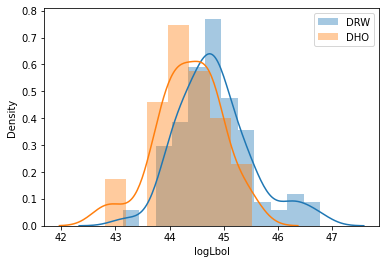

In [28]:
sns.distplot(merged_df.loc[drw_mask, 'logLbol'], label='DRW', kde=True)
sns.distplot(merged_df.loc[dho_mask, 'logLbol'], label='DHO', kde=True)
plt.legend()

<AxesSubplot:xlabel='logMbhGH05', ylabel='logLbol'>

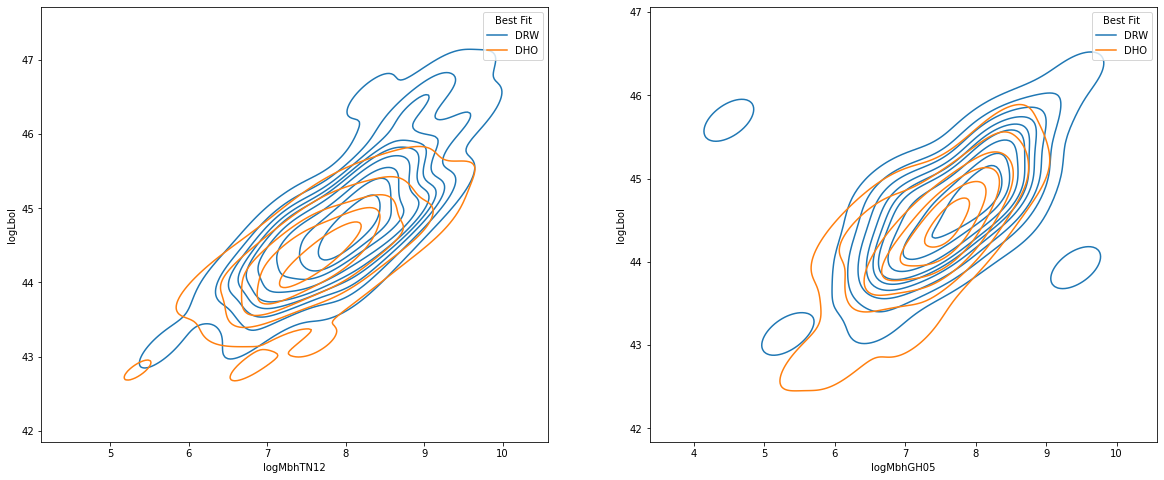

In [86]:
# Mass against the apparent magnitude
f, axs = plt.subplots(1, 2, figsize=(20, 8))

# Mass using TN12 method
sns.kdeplot(data=merged_df, x='logMbhTN12', y='logLbol', hue='Best Fit', ax=axs[0])
#sns.scatterplot(data=merged_df, x='logMbhTN12', y='logLbol', hue='Best Fit', ax=axs[0])

# Mass using GH05 method
sns.kdeplot(data=merged_df, x='logMbhGH05', y='logLbol', hue='Best Fit', ax=axs[1])
#sns.scatterplot(data=merged_df, x='logMbhGH05', y='logLbol', hue='Best Fit', ax=axs[1])

<AxesSubplot:xlabel='logMbhGH05', ylabel='logEratioSwift'>

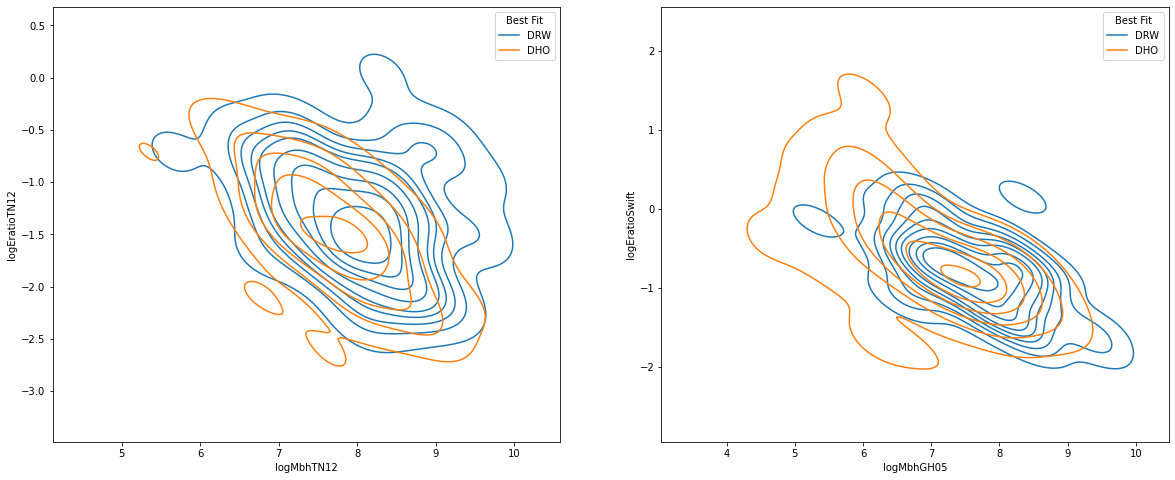

In [97]:
# Mass against the Eddington ratio
f, axs = plt.subplots(1, 2, figsize=(20, 8))

# Mass and Eddington using TN12 method
sns.kdeplot(data=merged_df, x='logMbhTN12', y='logEratioTN12', hue='Best Fit', ax=axs[0])

# Mass using GH05 method; Eddington provided by Swift/BAT telescope
sns.kdeplot(data=merged_df, x='logMbhGH05', y='logEratioSwift', hue='Best Fit', ax=axs[1])

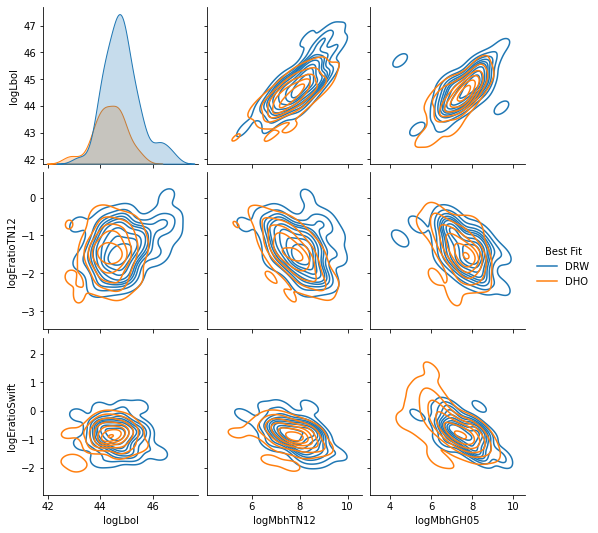

In [96]:
# Magnitude, Mass, and Eddigton Ratio
sns.pairplot(data=merged_df, x_vars=['logLbol', 'logMbhTN12', 'logMbhGH05'], 
             y_vars=['logLbol', 'logEratioTN12', 'logEratioSwift'], 
             hue='Best Fit', kind='kde')